In [40]:
import mglearn
# 사이킷런 패키지 데이터셋을 로딩
from sklearn.datasets import load_boston
# 회귀분석을 하기 위한 패키지
from sklearn.linear_model import LinearRegression
# 학습용, 검증용 데이터셋을 나누기 위한 패키지
from sklearn.model_selection import train_test_split

In [1]:
# 리눅스에서 한글 설정
import pandas as pd
import numpy as np
import warnings as wr
import matplotlib
import matplotlib.font_manager
#[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]

['NanumMyeongjo Eco',
 'NanumBarunGothic',
 'NanumGothic Eco',
 'NanumBarunpen',
 'Nanum Pen Script',
 'NanumGothicCoding',
 'NanumGothic Eco',
 'NanumGothic',
 'NanumSquare',
 'NanumGothicCoding',
 'NanumBarunGothic',
 'NanumSquareRound',
 'NanumSquare',
 'NanumMyeongjo Eco',
 'NanumSquareRound',
 'NanumSquare',
 'NanumSquareRound',
 'NanumGothic Eco',
 'NanumMyeongjo',
 'NanumMyeongjo',
 'NanumGothic',
 'NanumBarunGothic',
 'NanumBarunpen',
 'NanumGothic',
 'Nanum Brush Script',
 'NanumGothic',
 'NanumSquareRound',
 'NanumMyeongjo',
 'NanumSquare',
 'NanumBarunGothic',
 'NanumMyeongjo Eco']

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False
# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'
wr.filterwarnings('ignore')

In [3]:
# 데이터를 시트별로 불러오기
train_df = pd.read_excel('dataset/tv.xlsx', sheet_name='train')
test_df = pd.read_excel('dataset/tv.xlsx', sheet_name='test')

In [4]:
################## 데이터 전처리
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 12 columns):
ID      7000 non-null int64
판매가     7000 non-null int64
화면크기    7000 non-null int64
형태      7000 non-null int64
해상도     7000 non-null int64
화면비율    7000 non-null int64
LCD     7000 non-null int64
LED     7000 non-null int64
OLED    7000 non-null int64
QLED    7000 non-null int64
단자      7000 non-null int64
부가기능    7000 non-null int64
dtypes: int64(12)
memory usage: 656.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
ID      3000 non-null int64
판매가     3000 non-null int64
화면크기    3000 non-null int64
형태      3000 non-null int64
해상도     3000 non-null int64
화면비율    3000 non-null int64
LCD     3000 non-null int64
LED     3000 non-null int64
OLED    3000 non-null int64
QLED    3000 non-null int64
단자      3000 non-null int64
부가기능    3000 non-null int64
dtypes: int64(12)
memory usage: 281.3 KB


In [21]:
# 데이터의 크기 확인하기 (7000,12), (3000,12)
train_df.shape
test_df.shape

(3000, 12)

In [19]:
# null여부
train_df.isnull().sum()
test_df.isnull().sum()

ID      0
판매가     0
화면크기    0
형태      0
해상도     0
화면비율    0
LCD     0
LED     0
OLED    0
QLED    0
단자      0
부가기능    0
dtype: int64

In [24]:
# LCD, LED, OLED, QLED 의 값이 0인 데이터 행을 찾아서 삭제
df_search = train_df[(train_df['LCD']==0) & (train_df['LED']==0) & (train_df['OLED']==0) & (train_df['QLED']==0)]
df_search.shape

(0, 12)

In [25]:
# 위에서 검색한 365개의 행을 train 데이터에서 삭제
# 삭제 후 -> (6636, 12)

In [26]:
train_df = train_df.drop(df_search.index, axis=0)
train_df.shape

(6636, 12)

In [27]:
# 테스트 데이터에서도 마찬가지로 제거를 하자.
# 삭제 후 -> (2816, 12)
df_search = test_df[(test_df['LCD']==0) & (test_df['LED']==0) & (test_df['OLED']==0) & (test_df['QLED']==0)]
test_df = test_df.drop(df_search.index, axis=0)
test_df.shape

(2816, 12)

In [29]:
# 파라미터 추출
# x_train, x_test, y_train, y_test 란 변수로 칼럼값을 추출해서 대입
# y 값은 판매가이다. (종속변수)
print(train_df.info())

x_train_df = train_df.drop(['ID', '판매가'], axis=1)
x_test_df = test_df.drop(['ID', '판매가'], axis=1)
y_train_df = train_df['판매가']
y_test_df = test_df['판매가']
# 각 값을 파라미터로 설정
x_train = x_train_df.values
x_test = x_test_df.values
y_train = y_train_df.values
y_test = y_test_df.values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6636 entries, 0 to 6999
Data columns (total 12 columns):
ID      6636 non-null int64
판매가     6636 non-null int64
화면크기    6636 non-null int64
형태      6636 non-null int64
해상도     6636 non-null int64
화면비율    6636 non-null int64
LCD     6636 non-null int64
LED     6636 non-null int64
OLED    6636 non-null int64
QLED    6636 non-null int64
단자      6636 non-null int64
부가기능    6636 non-null int64
dtypes: int64(12)
memory usage: 674.0 KB
None


In [41]:
# 모델 설정 학습
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
# 모델 검증
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.5676150643429947
0.5365762057290634


In [43]:
# 모델 예측 - np.array
y_predict = model.predict([[55, 0, 2160, 1, 0, 1, 0, 0, 3, 1]])

In [44]:
import numpy as np
import matplotlib.pylab as plt

In [45]:
def step_function(x):
    return np.array(x>0, dtype=np.int)

In [46]:
np.arange(0)

array([], dtype=int64)

In [47]:
# -5.0 ~ 4.9 사이의 값 step 0.1 인 구간
x = np.arange(-5.0, 5.0, 0.1)

In [48]:
y = step_function(x)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [49]:
#n = 9.000000000e-01 0보다 적은 값 => 0.9
n = 1.000000000e+00 # 1.0 즉 0보다 큰 값
print(n)
np.array(n,dtype=int)

1.0


array(1)

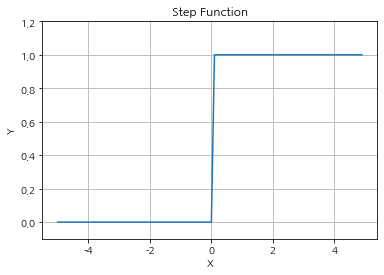

In [50]:
# 시각화로 보자. 0.5
plt.plot(x,y)
plt.grid(True)
plt.title('Step Function')
plt.ylim(-0.1, 1.2, 1)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [51]:
# 시그모이드 함수 만들기 (S자 만들기)
# 로지스틱 회귀분석 또는 Neural network 의 Binary classification
# 마지막 레이어의 활성함수로 사용하는 시그모이드, 은닉층이 많아지면서 소프트맥스로 변경 또는 대안이 있다.